# Modelado Estocástico
## Clase 9 - Modelos VAR (Vector Autoregressions)

In [24]:
! pip install arch

In [25]:
import pandas as pd
import numpy as np
from statsmodels.tsa.api import VAR
from arch.unitroot import DFGLS


Pandas nos permite abrir archvios de tipo `.dta`. para eso podemos utilizar el método `read_stata`. En este caso vamos a utilizar el archivo llamado `Precios_y_Dinero`.

In [26]:
df = pd.read_stata("./Precios_y_Dinero_data.dta")
print(df.columns.tolist())

['mmyy', 'ipc', 'm', 'm_en_ars']


Además, vamos a generar un índice asociado al período mensual correspondiente, para eso construímos la columna `period`.

In [27]:
inicio = pd.to_datetime(df['mmyy'].iloc[0], format='%b-%y').strftime('%Y-%m')
df["yearmm"] = pd.period_range(start=inicio, periods=len(df), freq="M")
df = df.set_index("yearmm")
df['ipc'] = df['ipc'].astype(float)
df['m'] = df['m'].astype(float)
df.head()

,mmyy,ipc,m,m_en_ars
yearmm,,,,
2003-01,Jan-03,100.00,100.00,29609.92
2003-02,Feb-03,100.57,99.36,29420.37
2003-03,Mar-03,101.16,102.63,30388.08
2003-04,Apr-03,101.21,104.26,30870.99
2003-05,May-03,100.82,111.80,33105.17


Generamos las variables Inflación y Tasa de Crecimiento de la Base Monetaria

In [28]:
df["infl"] = df["ipc"] / df["ipc"].shift(1) - 1
df["crec_m"] = df["m"] / df["m"].shift(1) - 1
df = df[['infl','crec_m']]


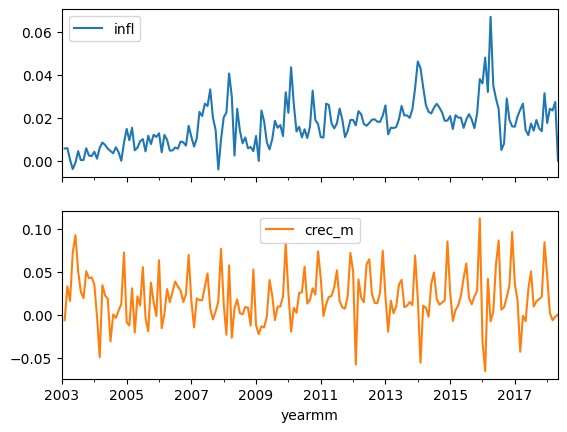

In [29]:
### graficamos ambas series, infl y crec_m
import matplotlib.pyplot as plt
df.plot(subplots=True)
plt.show()


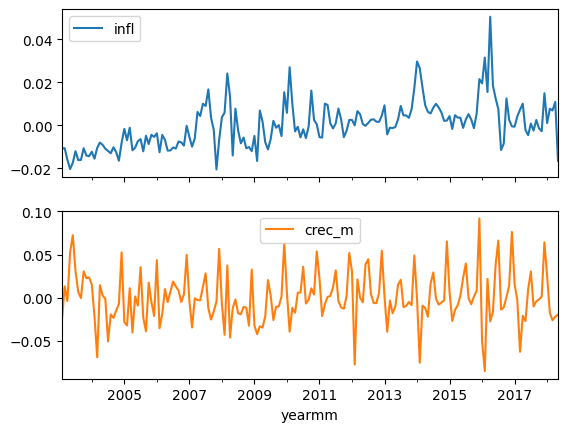

In [30]:
## remuevo la tendencia deterministica
df = df.dropna()
df = df - df.mean()
df.head()
df.describe()

## graficamos de nuevo
df.plot(subplots=True)
plt.show()

## Chequeo de estacionariedad utilizando la prueba de Dickey-Fuller GLS

Debemos corrobar que sean estacionarias. Para eso tenemos diferentes alternativas, acorde con lo visto en clase vamos a utilizar una biblioteca (`arch`) que desarrolla la prueba de Dickey-Fuller GLS (Elliott-Rothenberg-Stock) en línea con el uso del comando `dfgls` de Stata.

In [31]:
test = DFGLS(df["infl"].dropna(),trend="c")
print("Inflación")
print(test.summary())

Inflación
      Dickey-Fuller GLS Results      
Test Statistic                 -3.295
P-value                         0.001
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -2.68 (1%), -2.06 (5%), -1.74 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [32]:
test = DFGLS(df["crec_m"].dropna(),trend="c")
print("Tasa de Crecimiento de la Base Monetaria")
print(test.summary())

Tasa de Crecimiento de la Base Monetaria
      Dickey-Fuller GLS Results      
Test Statistic                 -1.174
P-value                         0.227
Lags                               14
-------------------------------------

Trend: Constant
Critical Values: -2.68 (1%), -2.06 (5%), -1.75 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


## Corremos el VAR(2) bivariado

In [33]:
model = VAR(df[["infl", "crec_m"]].dropna())
result_var2 = model.fit(2)
print(result_var2.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 30, Aug, 2025
Time:                     02:26:04
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -16.6022
Nobs:                     182.000    HQIC:                  -16.7069
Log likelihood:           1020.33    FPE:                5.16789e-08
AIC:                     -16.7782    Det(Omega_mle):     4.89523e-08
--------------------------------------------------------------------
Results for equation infl
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.000030         0.000587            0.051           0.959
L1.infl           0.517731         0.075813            6.829           0.000
L1.crec_m         0.020715         0.020682            1.002           0.317


### Selection Order Criteria

In [35]:
print(model.select_order().summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -16.27      -16.24   8.561e-08      -16.26
1       -16.73     -16.62*   5.441e-08      -16.68
2       -16.79      -16.60   5.127e-08      -16.71
3       -16.83      -16.57   4.923e-08     -16.72*
4       -16.82      -16.49   4.935e-08      -16.69
5       -16.81      -16.40   5.025e-08      -16.64
6       -16.82      -16.34   4.960e-08      -16.63
7       -16.84      -16.29   4.863e-08      -16.62
8       -16.83      -16.20   4.918e-08      -16.57
9       -16.81      -16.11   5.025e-08      -16.52
10      -16.87      -16.10   4.714e-08      -16.56
11      -16.86      -16.01   4.764e-08      -16.52
12      -16.98      -16.06   4.232e-08      -16.61
13     -16.99*      -15.99  4.225e-08*      -16.58
14      -16.95      -15.88   4.377e-08      -16.52
--------------------------------------------------


### VAR(8) bivariado

In [36]:
result_var8 = model.fit(8)
print(result_var8.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 30, Aug, 2025
Time:                     02:26:40
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -16.2262
Nobs:                     176.000    HQIC:                  -16.5903
Log likelihood:           1016.34    FPE:                4.87039e-08
AIC:                     -16.8387    Det(Omega_mle):     4.05018e-08
--------------------------------------------------------------------
Results for equation infl
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             0.000289         0.000593            0.487           0.626
L1.infl           0.498804         0.080740            6.178           0.000
L1.crec_m         0.020150         0.023985            0.840           0.401


### Estabilidad del VAR (chequeo que no haya raices unitarias)

In [40]:
roots = result_var2.roots
print("Raíces del VAR(2):")
display(roots)
print(np.abs(result_var2.roots))
print("¿Estable?", np.all(np.abs(result_var2.roots) > 1))


Raíces del VAR(2):


array([-4.10053618-0.j        ,  0.30599245+2.11843778j,
        0.30599245-2.11843778j,  1.27533308-0.j        ])

[4.10053618 2.14042286 2.14042286 1.27533308]
¿Estable? True


### Testeo si los residuos estan autocorrelacionados

Este test no es exactamente el de Stata, pero es similar

In [41]:
wb = result_var2.test_whiteness(nlags=12)
print(wb)

<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 12 is zero: reject at 5% significance level. Test statistic: 89.230, critical value: 55.758>, p-value: 0.000>


Hipótesis nula (H₀): Los residuos del VAR no tienen autocorrelación (hasta el lag que indicas, en este caso 12).

Hipótesis alternativa (H₁): Hay autocorrelación en los residuos.

Como rechazo==> hay autocorrelacio y por lo tanto no sirve el modelo para predecir

En términos prácticos: el modelo está mal especificado (quedaron patrones en los residuos).

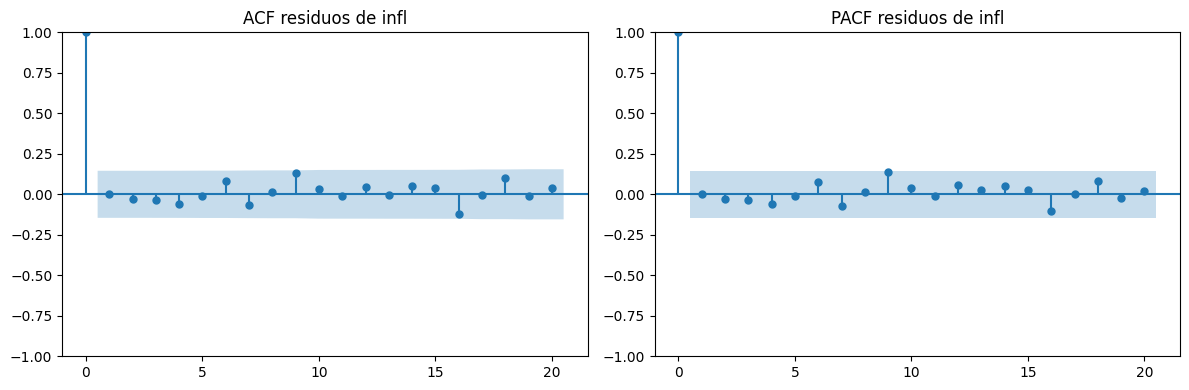

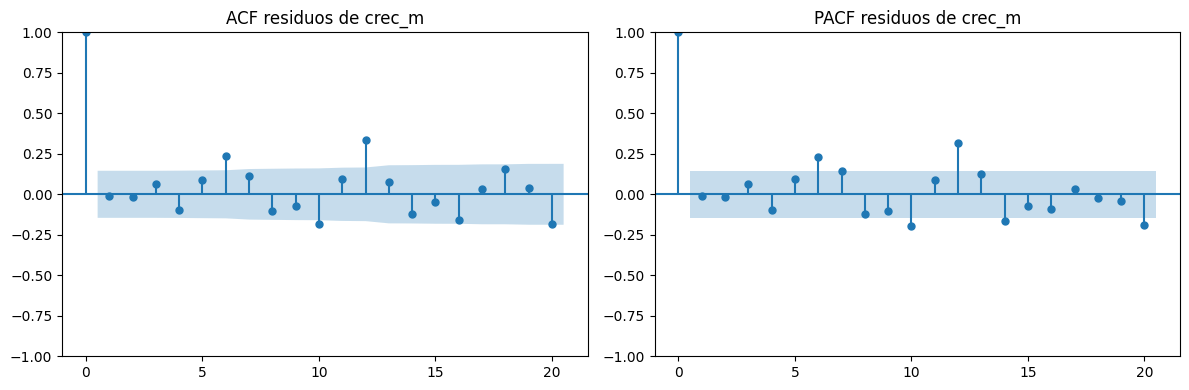

In [43]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Residuos del VAR(2) (suponiendo que ya ajustaste el modelo var2_1)
resid = result_var2.resid

# Iterar sobre cada variable del sistema
for col in resid.columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    # ACF
    plot_acf(resid[col], lags=20, ax=axes[0])
    axes[0].set_title(f"ACF residuos de {col}")
    
    # PACF
    plot_pacf(resid[col], lags=20, ax=axes[1])
    axes[1].set_title(f"PACF residuos de {col}")
    
    plt.tight_layout()
    plt.show()

Para visualizar los p-values

In [ ]:
for h in range(3, 13):
    r = res.test_whiteness(nlags=h, adjusted=True)
    print(h, r.pvalue)

3 0.049200912720048444
4 0.09035470520232061
5 0.11196457499752267
6 0.01734572205659903
7 0.02561753217196393
8 0.03763399615991656
9 0.006060635887250186
10 0.0020694024894899305
11 0.0010173444004396167
12 3.4536430816230852e-06


### Testeo por Causalidad en Sentido de Granger

In [ ]:
print(result_var2.test_causality("infl", ["crec_m"], kind="f"))

print(result_var2.test_causality("crec_m", ["infl"], kind="f"))

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: crec_m does not Granger-cause infl: fail to reject at 5% significance level. Test statistic: 0.532, critical value: 3.021>, p-value: 0.588>
<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: infl does not Granger-cause crec_m: reject at 5% significance level. Test statistic: 4.556, critical value: 3.021>, p-value: 0.011>
